Heart Attacks dataset

In [35]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sb



from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)
%matplotlib inline

read data

In [36]:
heart = pd.read_csv(r"C:\Users\M\OneDrive\Desktop\heart attack\archive\heart.csv")
saturation = pd.read_csv(r"C:\Users\M\OneDrive\Desktop\heart attack\archive\o2Saturation.csv")
print("heart data shape : " ) 
print(heart.shape)
print("saturation data shape : " ) 
print(saturation.shape)

heart data shape : 
(303, 14)
saturation data shape : 
(3585, 1)


In [37]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
saturation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float64
dtypes: float64(1)
memory usage: 28.1 KB


In [39]:
heart.head()



age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [40]:
saturation.head()

98.6
0  98.6
1  98.6
2  98.6
3  98.1
4  97.5

In [41]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [42]:
saturation.isnull().sum()

98.6    0
dtype: int64

In [43]:
heart.duplicated().sum()

1

In [44]:
heart.drop_duplicates(inplace=True)

In [45]:
saturation.duplicated().sum()

3568

In [57]:
df = heart.copy()
df["O2Sat"] = saturation.copy()
df.head() # Merge the two files

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  O2Sat  
0    0      1       1   98.6  
1    0      2       1   98.6  
2    0      2       1   98.6  
3    0      2       1   98.1  
4    0      2       1   97.5

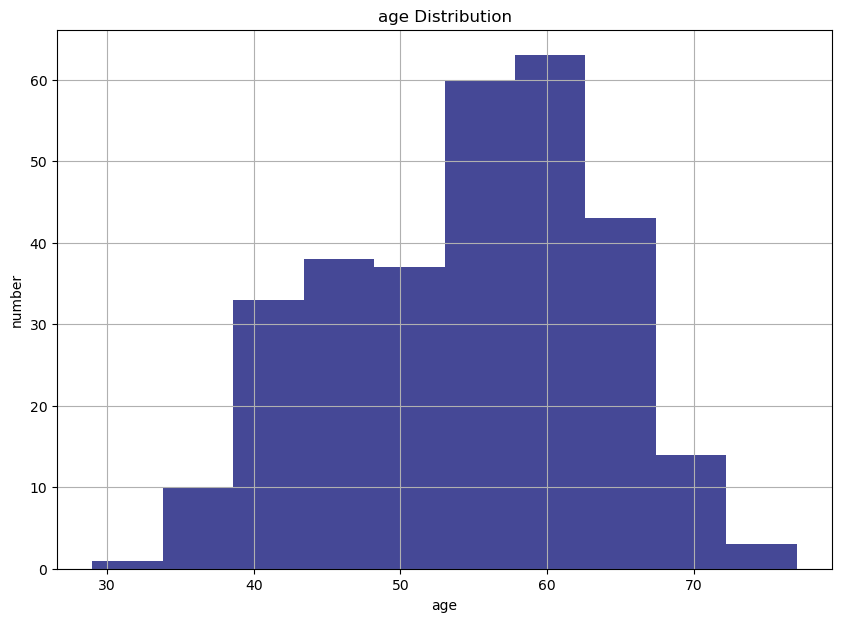

In [58]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(heart["age"],
       color='#454896',)
plt.grid()
plt.xlabel("age")
plt.ylabel("number")
plt.title("age Distribution")

 
# Show plot
plt.show()

In [47]:
heart['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

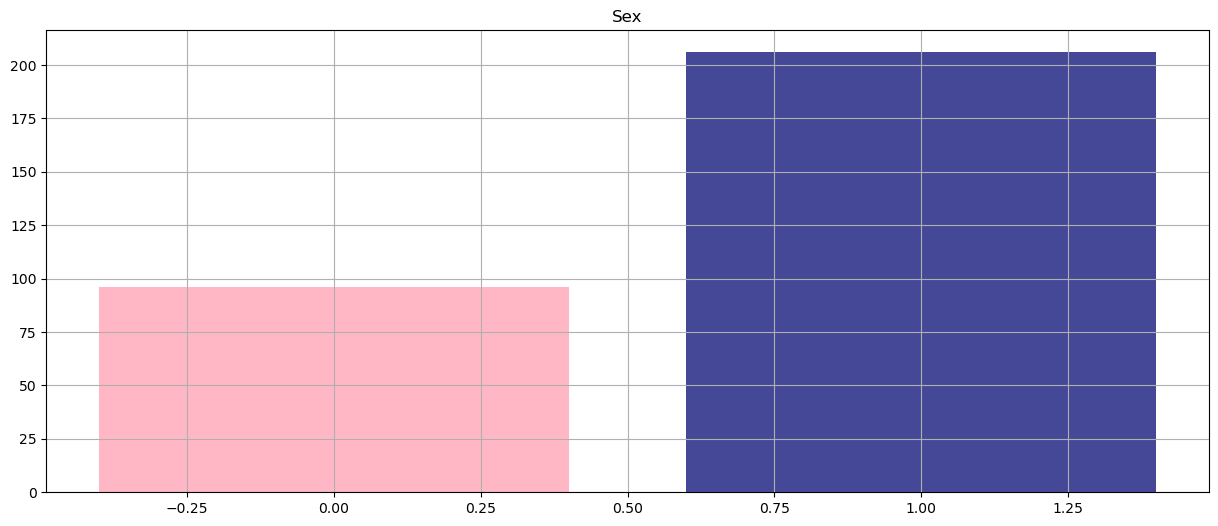

In [48]:

fig, ax = plt.subplots(figsize=(15,6))
plt.bar(x=heart['sex'].value_counts().index,
        height=heart['sex'].value_counts().values,
        color=['#454896','#ffb7c5']
       );
plt.grid()
plt.title("Sex")
plt.show

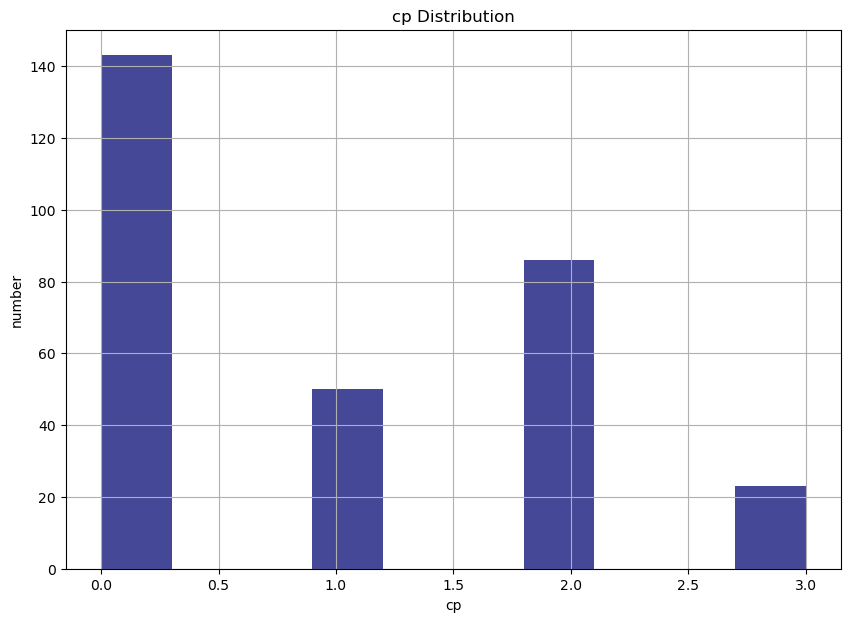

In [49]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(heart["cp"],
       color='#454896')
plt.grid()
plt.xlabel("cp")
plt.ylabel("number")
plt.title("cp Distribution")

 
# Show plot
plt.show()

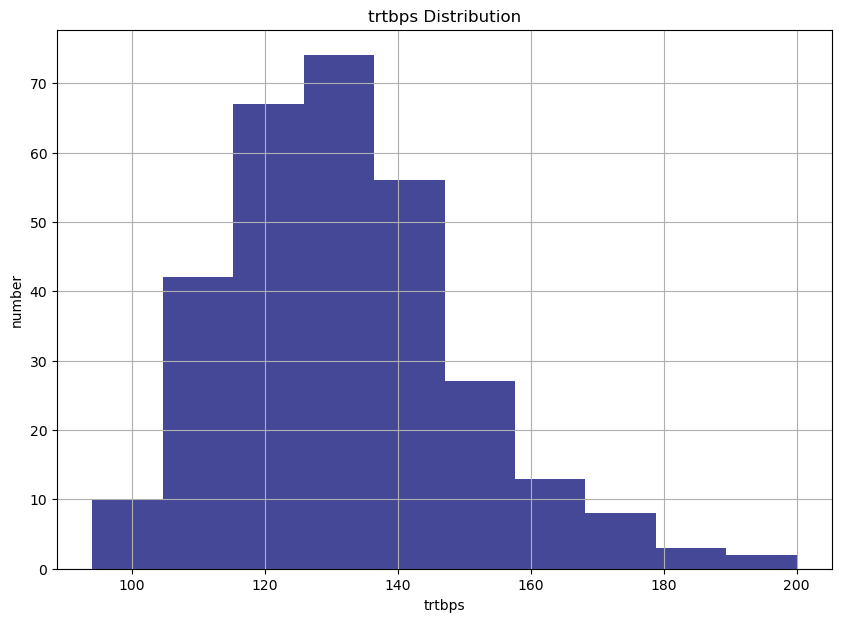

In [50]:

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(heart["trtbps"],
       color='#454896')
plt.grid()
plt.xlabel("trtbps")
plt.ylabel("number")
plt.title("trtbps Distribution")

 
# Show plot
plt.show()

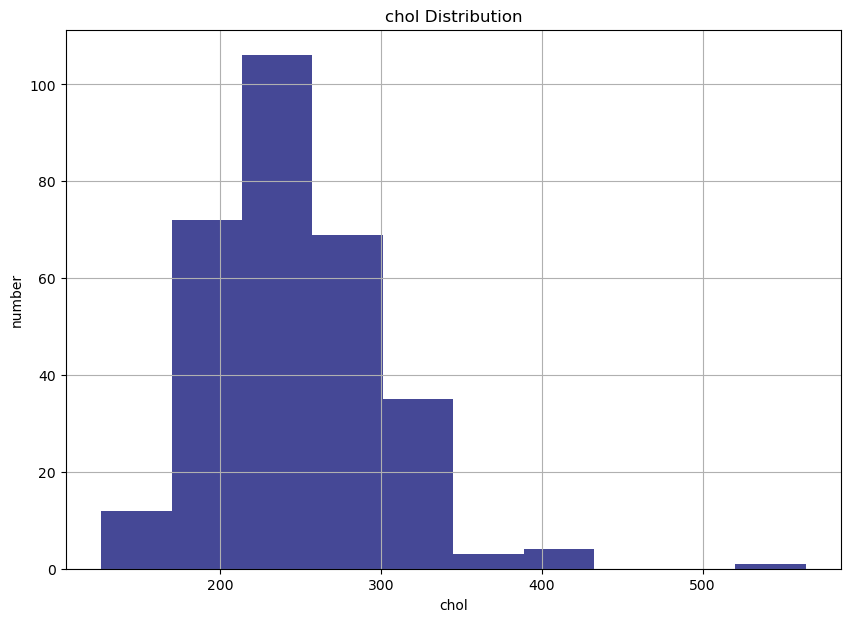

In [51]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(heart["chol"],
       color='#454896')
plt.grid()
plt.xlabel("chol")
plt.ylabel("number")
plt.title("chol Distribution")

 
# Show plot
plt.show()

In [52]:
heart.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.094962 -0.063107  0.283121  0.207216  0.119492   
sex      -0.094962  1.000000 -0.051740 -0.057647 -0.195571  0.046022   
cp       -0.063107 -0.051740  1.000000  0.046486 -0.072682  0.096018   
trtbps    0.283121 -0.057647  0.046486  1.000000  0.125256  0.178125   
chol      0.207216 -0.195571 -0.072682  0.125256  1.000000  0.011428   
fbs       0.119492  0.046022  0.096018  0.178125  0.011428  1.000000   
restecg  -0.111590 -0.060351  0.041561 -0.115367 -0.147602 -0.083081   
thalachh -0.395235 -0.046439  0.293367 -0.048023 -0.005308 -0.007169   
exng      0.093216  0.143460 -0.392937  0.068526  0.064099  0.024729   
oldpeak   0.206040  0.098322 -0.146692  0.194600  0.050086  0.004514   
slp      -0.164124 -0.032990  0.116854 -0.122873  0.000417 -0.058654   
caa       0.302261  0.113060 -0.195356  0.099248  0.086878  0.144935   
thall     0.065317  0.211452 -0.160370  0.062870  0.096810 -0.032752   
output   -0.221476 -0.283609  0.432080 -0.146269 -0.081437 -0.026826   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.111590 -0.395235  0.093216  0.206040 -0.164124  0.302261   
sex      -0.060351 -0.046439  0.143460  0.098322 -0.032990  0.113060   
cp        0.041561  0.293367 -0.392937 -0.146692  0.116854 -0.195356   
trtbps   -0.115367 -0.048023  0.068526  0.194600 -0.122873  0.099248   
chol     -0.147602 -0.005308  0.064099  0.050086  0.000417  0.086878   
fbs      -0.083081 -0.007169  0.024729  0.004514 -0.058654  0.144935   
restecg   1.000000  0.041210 -0.068807 -0.056251  0.090402 -0.083112   
thalachh  0.041210  1.000000 -0.377411 -0.342201  0.384754 -0.228311   
exng     -0.068807 -0.377411  1.000000  0.286766 -0.256106  0.125377   
oldpeak  -0.056251 -0.342201  0.286766  1.000000 -0.576314  0.236560   
slp       0.090402  0.384754 -0.256106 -0.576314  1.000000 -0.092236   
caa      -0.083112 -0.228311  0.125377  0.236560 -0.092236  1.000000   
thall    -0.010473 -0.094910  0.205826  0.209090 -0.103314  0.160085   
output    0.134874  0.419955 -0.435601 -0.429146  0.343940 -0.408992   

             thall    output  
age       0.065317 -0.221476  
sex       0.211452 -0.283609  
cp       -0.160370  0.432080  
trtbps    0.062870 -0.146269  
chol      0.096810 -0.081437  
fbs      -0.032752 -0.026826  
restecg  -0.010473  0.134874  
thalachh -0.094910  0.419955  
exng      0.205826 -0.435601  
oldpeak   0.209090 -0.429146  
slp      -0.103314  0.343940  
caa       0.160085 -0.408992  
thall     1.000000 -0.343101  
output   -0.343101  1.000000

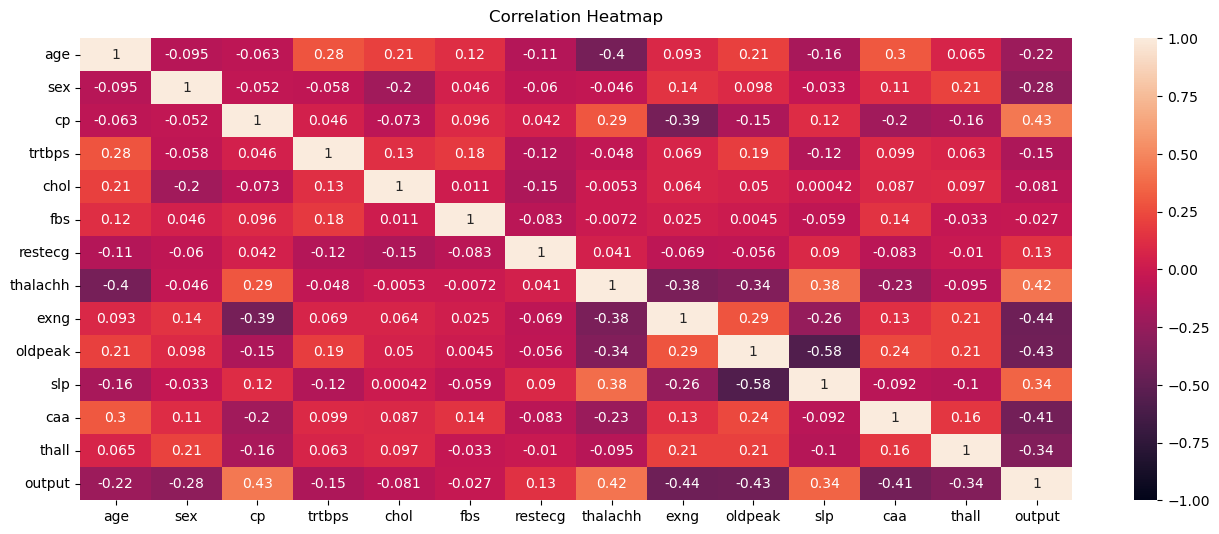

In [53]:

plt.figure(figsize=(16, 6))
# plotting correlation heatmap
heartplot = sb.heatmap(heart.corr(), annot=True,vmin=-1, vmax=1)

heartplot.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
  
# displaying heatmap
plt.show()

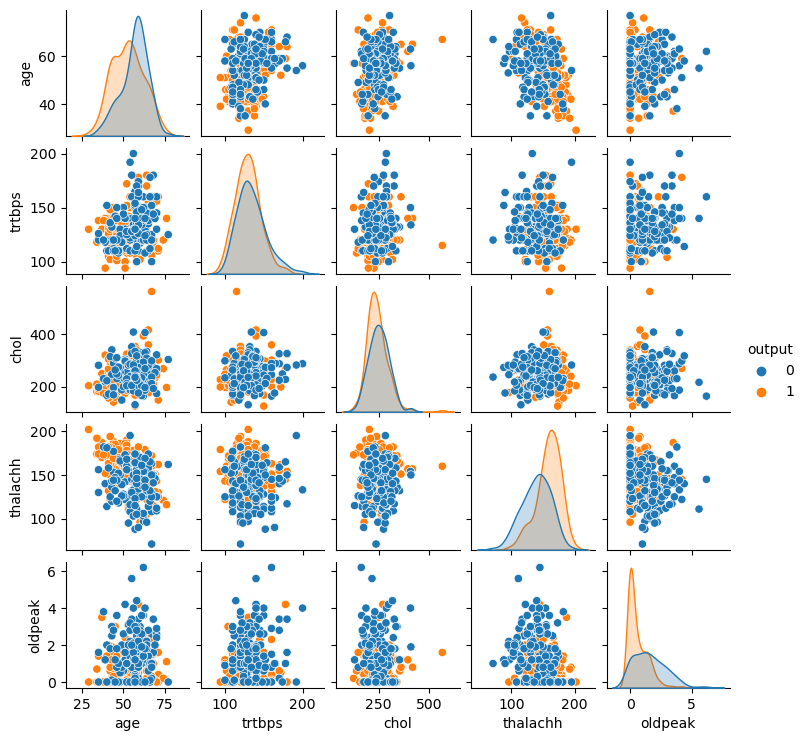

In [54]:
data_temp = heart[['age','trtbps','chol','thalachh','oldpeak','output']]
sb.pairplot(data_temp, hue="output",height=1.5)
plt.show()


<Axes: xlabel='output', ylabel='count'>

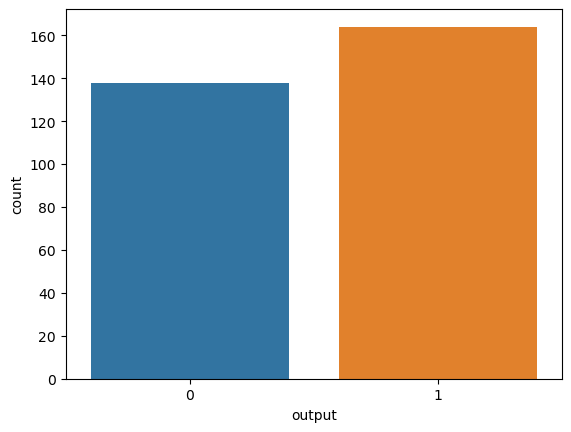

In [55]:
sb.countplot(x='output', data=heart)

In [59]:

X = df.drop('output', axis=1)
y = df['output']


In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [64]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [65]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

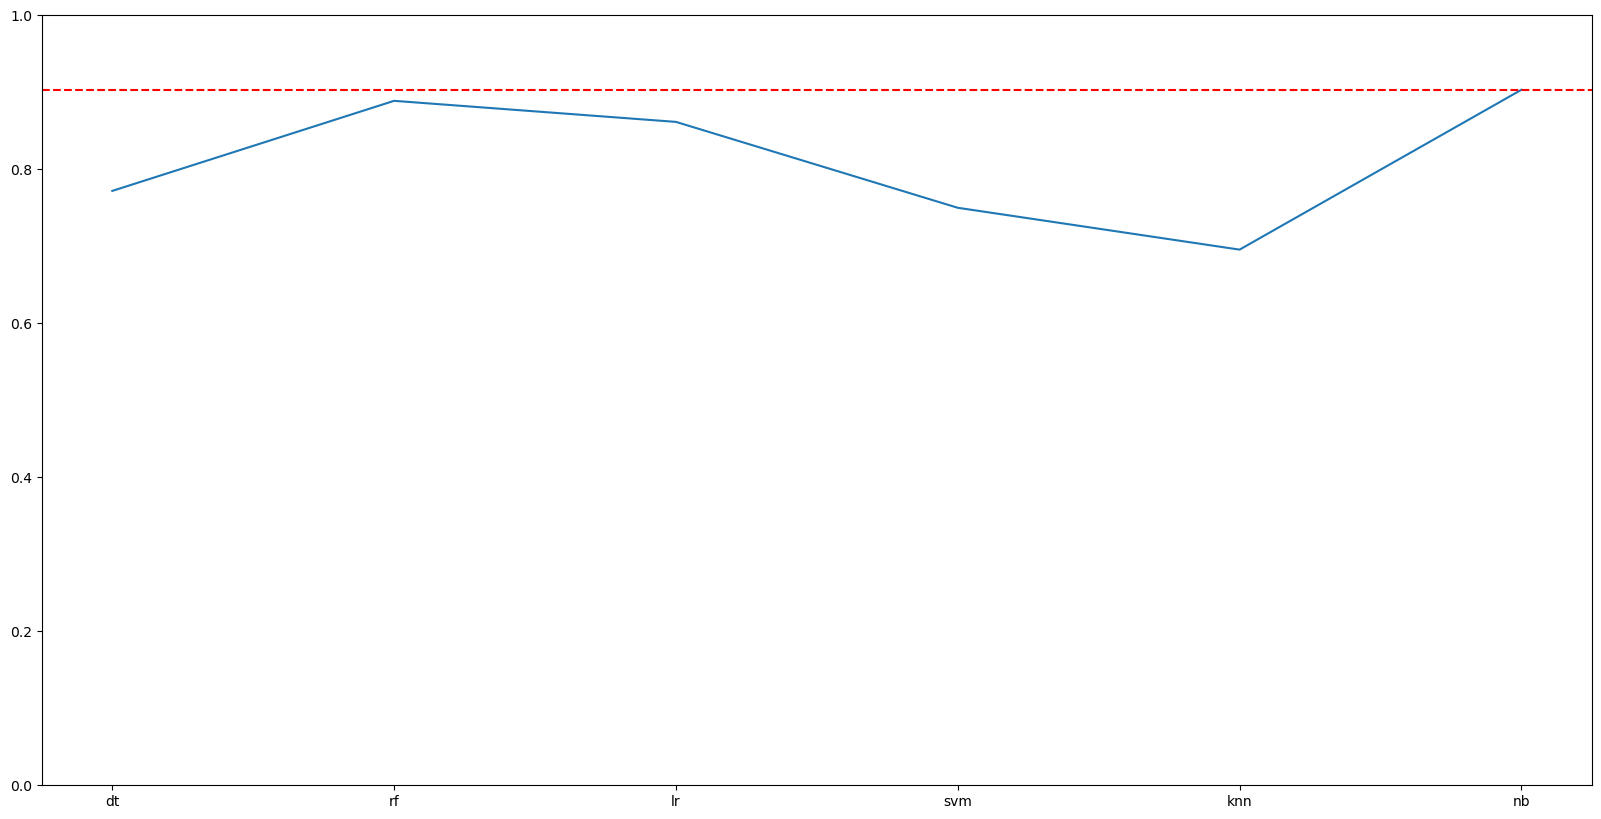

In [69]:
models = [dt, rf, lr, svm, knn, nb]
scores = []

for model in models:
    scores.append(f1_score(y_test, model.predict(x_test)))

plt.figure(figsize=(20, 10))
plt.plot(scores)
plt.axhline(max(scores), color='r', linestyle='--')
plt.xticks(range(len(models)), ['dt', 'rf', 'lr', 'svm', 'knn', 'nb'])
plt.ylim(0, 1)
plt.show()